In [6]:
import pandas as pd

pd.DataFrame

pandas.core.frame.DataFrame

In [7]:
def loader(file, is_number = False):
    data = []
    with open(file, encoding="utf8") as my_file:
        data = my_file.read().splitlines()
    if is_number:
        data = [int(i) for i in data]
    return data

In [8]:
test_data = loader("Raw/test_text.txt")
test_labels = loader("Raw/test_labels.txt", True)
val_data = loader("Raw/val_text.txt")
val_labels = loader("Raw/val_labels.txt", True)
train_data = loader("Raw/train_text.txt")
train_labels = loader("Raw/train_labels.txt", True)
mappings = {0:"anger", 1:"joy", 2:"optimism",3:	"sadness"}

In [38]:
test = pd.DataFrame({"text":test_data, "label":test_labels, "emotion":[mappings[i] for i in test_labels]})
val = pd.DataFrame({"text":val_data, "label":val_labels, "emotion":[mappings[i] for i in val_labels]})
train = pd.DataFrame({"text":train_data, "label":train_labels, "emotion":[mappings[i] for i in train_labels]})

In [42]:
train = train[train.label!=3]
val = val[val.label!=3]

In [39]:
train

,text,label,emotion
0,“Worry is a down payment on a problem you may never have'. Joyce Meyer. #motivation #leadership #worry,2,optimism
1,My roommate: it's okay that we can't spell because we have autocorrect. #terrible #firstworldprobs,0,anger
2,No but that's so cute. Atsu was probably shy about photos before but cherry helped her out uwu,1,joy
3,"Rooneys fucking untouchable isn't he? Been fucking dreadful again, depay has looked decent(ish)tonight",0,anger
4,it's pretty depressing when u hit pan on ur favourite highlighter,3,sadness
...,...,...,...
3252,"I get discouraged because I try for 5 fucking years a contact with Lady Gaga but are thousands of tweets, how she would see my tweet? :(",3,sadness
3253,The @user are in contention and hosting @user nation and Camden is empty #sad,3,sadness
3254,"@user @user @user @user @user as a fellow UP grad, i shiver at the shallowness of his arguments",0,anger
3255,You have a #problem? Yes! Can you do #something about it? No! Than why,0,anger


In [29]:
import adaptnlp

In [30]:
from adaptnlp  import HFModelHub, HF_TASKS

In [12]:
hub = HFModelHub()

In [13]:
models = hub.search_model_by_task(HF_TASKS.TEXT_CLASSIFICATION)

In [14]:
models

[Model Name: distilbert-base-uncased-finetuned-sst-2-english, Tasks: [text-classification],
 Model Name: roberta-large-mnli, Tasks: [text-classification],
 Model Name: roberta-base-openai-detector, Tasks: [text-classification],
 Model Name: roberta-large-openai-detector, Tasks: [text-classification]]

In [34]:
model = models[1]

In [35]:
model

Model Name: roberta-large-mnli, Tasks: [text-classification]

In [17]:
from adaptnlp import TaskDatasets

In [31]:
from adaptnlp import TaskDatasets,SequenceClassificationDatasets

In [19]:
def get_y(items:pd.DataFrame):
    idxs = (items["is_valid"].values.astype('bool'))
    train_idxs, valid_idxs = [], []
    for i,idx in enumerate(idxs):
        train_idxs.append(i) if idx else valid_idxs.append(i)
    return (train_idxs, valid_idxs)

In [43]:
dsets = SequenceClassificationDatasets.from_dfs(
    train,
    text_col='text',
    label_col='label',
    tokenizer_name=model.name,
    tokenize=True,
    valid_df=val,
    tokenize_kwargs={'max_length':68, 'truncation':True, 'padding':True}
)

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [51]:
dls = dsets.dataloaders(batch_size=64)

In [52]:
from adaptnlp import SequenceClassificationTuner

tuner = SequenceClassificationTuner(dls, model.name, num_classes=3)


Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [46]:
_ = [print(m.name) for m in tuner.metrics]

accuracy
f1_score


In [47]:
tuner.loss_func

FlattenedLoss of CrossEntropyLoss()

SuggestedLRs(valley=0.0003981071640737355)

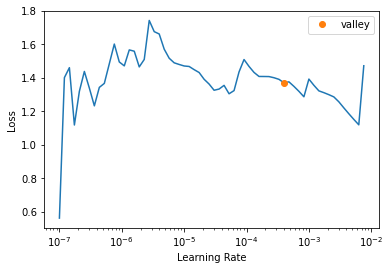

In [22]:
tuner.lr_find()

In [49]:
lr = 5e-3

In [53]:
from adaptnlp import Strategy

tuner.tune(1, lr, strategy=Strategy.OneCycle)

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:79] data. DefaultCPUAllocator: not enough memory: you tried to allocate 17825792 bytes.

In [31]:
import torch
torch.cuda.empty_cache()


In [5]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

KeyError: 'allocated_bytes.all.current'

In [28]:
import gc
del variables
gc.collect()

NameError: name 'variables' is not defined

In [2]:
import torch


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
Strategy.